<a href="https://colab.research.google.com/github/AtaDemirkiran/loan-status-prediction-machine-learning/blob/main/kredi_onay_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Makine Öğrenmesi ile Kredi Onay Durum Tahmini

In [ ]:
# dataset
# https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [ ]:
df.tail(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [ ]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# cinsiyet için kategorik degerlerin sayısal hale getirilmesi
# female = 0 , male = 1
df['person_gender'] = df['person_gender'].map({'female' : 0 , 'male' : 1})

In [ ]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [ ]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
# education için sırası önemli olacak şekilde sayısal değerlerin atılması 0,1,2,3,4
education_encoder = OrdinalEncoder(categories=[['High School', 'Associate', 'Bachelor','Master','Doctorate']])

In [ ]:
df['person_education_encoder'] = education_encoder.fit_transform(df[['person_education']])

In [ ]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_encoder
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.drop('person_education',axis=1,inplace=True)
df.rename(columns={'person_education_encoder':'person_education'},inplace=True)

In [ ]:
df.head(3)

,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education
0,22.0,0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0
1,21.0,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0
2,25.0,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0


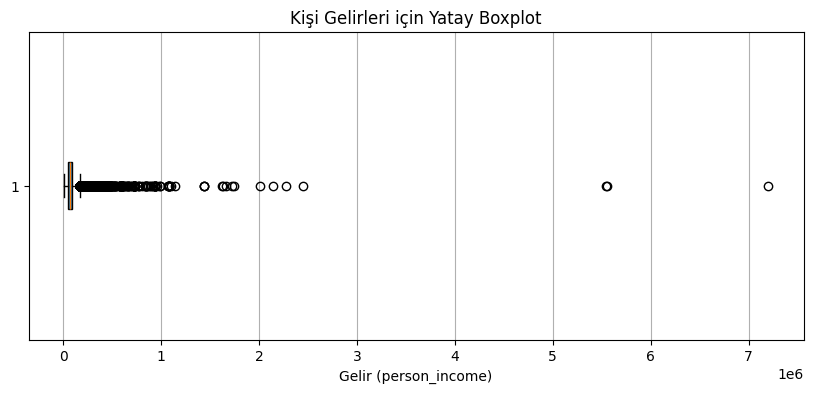

In [ ]:
# Boxplot income seviyesi
plt.figure(figsize=(10,4))
plt.boxplot(df['person_income'], vert=False, patch_artist=True)
plt.title('Kişi Gelirleri için Yatay Boxplot')
plt.xlabel('Gelir (person_income)')
plt.grid(axis='x')
plt.show()

In [ ]:
# person_income için alt sınır "-" deger cıktıgı için 0 kabul ediyorum

Q1 = df["person_income"].quantile(0.25)
Q3 = df["person_income"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

alt_sinir = max(alt_sinir, 0)

outliers_for_income = df[df["person_income"] > ust_sinir]

print('alt_sinir',alt_sinir)
print('ust_sinir',ust_sinir)

alt_sinir 0
ust_sinir 168667.125


In [ ]:
# person_income için çıkan outlier degerler
outliers_for_income['person_income']

,person_income
15,600891.0
20,195718.0
33,368115.0
34,361076.0
42,361293.0
...,...
44831,192090.0
44836,293525.0
44922,726416.0
44947,705960.0


In [ ]:
# person_income için log2 + 1 dönüşümü ve max-min normalizasyonun yapılması

In [ ]:
income_log = df['person_income'].apply(lambda x: np.log2(x) + 1 if x > 0 else x)

In [ ]:
income_log.head(3)

,person_income
0,17.134667
1,14.584258
2,14.602467


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['income_normalized'] = scaler.fit_transform(income_log.values.reshape(-1, 1))

In [ ]:
df.head(3)

,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,income_normalized
0,22.0,0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0,0.322896
1,21.0,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0,0.063020
2,25.0,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0,0.064875


In [ ]:
df.drop('person_income',axis=1,inplace=True)
df.rename(columns={'income_normalized':'person_income'},inplace=True)

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,person_income
0,22.0,0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0,0.322896
1,21.0,0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0,0.063020
2,25.0,0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0,0.064875


In [ ]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
# home_ownership için onehot encoding (sırası önemsiz şekilde) işleminin yapılması, sayısal hale getirmek için

df = pd.get_dummies(df, columns=['person_home_ownership'])

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,person_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0,0.322896,False,False,False,True
1,21.0,0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0,0.063020,False,False,True,False
2,25.0,0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0,0.064875,True,False,False,False


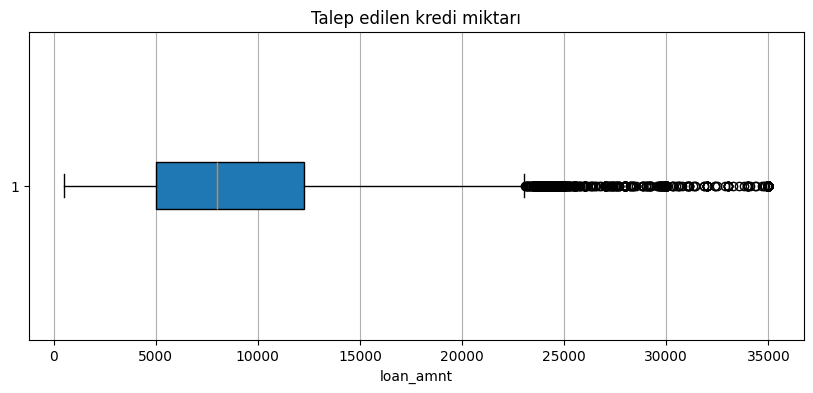

In [ ]:
# Boxplot income seviyesi
plt.figure(figsize=(10,4))
plt.boxplot(df['loan_amnt'], vert=False, patch_artist=True)
plt.title('Talep edilen kredi miktarı')
plt.xlabel('loan_amnt')
plt.grid(axis='x')
plt.show()

In [ ]:
# loan_amnt için alt sınır "-" deger cıktıgı için 0 kabul ediyorum

Q1 = df["loan_amnt"].quantile(0.25)
Q3 = df["loan_amnt"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

alt_sinir = max(alt_sinir, 0)

# Hem alt sınırdan küçük hem de üst sınırdan büyük olanları filtreleyin
outliers_for_loan_amount = df[(df["loan_amnt"] < alt_sinir) | (df["loan_amnt"] > ust_sinir)]

print('alt_sinir', alt_sinir)
print('ust_sinir', ust_sinir)

alt_sinir 0
ust_sinir 23093.125


In [ ]:
outliers_for_loan_amount['loan_amnt']

,loan_amnt
0,35000.0
3,35000.0
4,35000.0
6,35000.0
7,35000.0
...,...
44922,24890.0
44944,30000.0
44952,24000.0
44970,25000.0


In [ ]:
# loan_amnt (talep edilen kredi miktarı) için log2 + 1 dönüşümü ve max-min normalizasyonun yapılması

In [ ]:
#log2 + 1  dönüşümü

loan_amount_log = df['loan_amnt'].apply(lambda x: np.log2(x) + 1 if x > 0 else x)

In [ ]:
df['loan_amount_normalized'] = scaler.fit_transform(loan_amount_log.values.reshape(-1, 1))

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,person_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_amount_normalized
0,22.0,0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0,0.322896,False,False,False,True,1.000000
1,21.0,0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0,0.063020,False,False,True,False,0.163151
2,25.0,0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.0,0.064875,True,False,False,False,0.564410


In [ ]:
df.drop('loan_amnt',axis=1,inplace=True)
df.rename(columns={'loan_amount_normalized':'loan_amnt'},inplace=True)

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,person_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_amnt
0,22.0,0,0,PERSONAL,16.02,0.49,3.0,561,No,1,3.0,0.322896,False,False,False,True,1.000000
1,21.0,0,0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.0,0.063020,False,False,True,False,0.163151
2,25.0,0,3,MEDICAL,12.87,0.44,3.0,635,No,1,0.0,0.064875,True,False,False,False,0.564410


In [ ]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
# loan_intent (başvurulan kredi tipi) için onehot encoding (sırası önemsiz şekilde) yapılıyor.(sayısal hale gtirilmek için)
df = pd.get_dummies(df, columns=['loan_intent'])

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_amnt,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,0,16.02,0.49,3.0,561,No,1,3.0,...,False,False,True,1.000000,False,False,False,False,True,False
1,21.0,0,0,11.14,0.08,2.0,504,Yes,0,0.0,...,False,True,False,0.163151,False,True,False,False,False,False
2,25.0,0,3,12.87,0.44,3.0,635,No,1,0.0,...,False,False,False,0.564410,False,False,False,True,False,False


In [ ]:
# previous_loan_defaults_on_file için 0-1 şeklinde sayısal hale getirilmesi.
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes' : 1, 'No' : 0})

In [ ]:
# Yeni kolon sırası
new_column_order = ['person_age', 'person_gender', 'person_emp_exp', 'loan_int_rate',
                    'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
                    'previous_loan_defaults_on_file', 'person_education', 'person_income',
                    'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
                    'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_amnt',
                    'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
                    'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
                    'loan_intent_VENTURE', 'loan_status']

# df'nin kolonlarını yeniden sıralama
df = df[new_column_order]

In [ ]:
df.head(3)

,person_age,person_gender,person_emp_exp,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education,person_income,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_amnt,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,22.0,0,0,16.02,0.49,3.0,561,0,3.0,0.322896,...,False,True,1.000000,False,False,False,False,True,False,1
1,21.0,0,0,11.14,0.08,2.0,504,1,0.0,0.063020,...,True,False,0.163151,False,True,False,False,False,False,0
2,25.0,0,3,12.87,0.44,3.0,635,0,0.0,0.064875,...,False,False,0.564410,False,False,False,True,False,False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_int_rate                   45000 non-null  float64
 4   loan_percent_income             45000 non-null  float64
 5   cb_person_cred_hist_length      45000 non-null  float64
 6   credit_score                    45000 non-null  int64  
 7   previous_loan_defaults_on_file  45000 non-null  int64  
 8   person_education                45000 non-null  float64
 9   person_income                   45000 non-null  float64
 10  person_home_ownership_MORTGAGE  45000 non-null  bool   
 11  person_home_ownership_OTHER     45000 non-null  bool   
 12  person_home_ownership_OWN       

# ***Makine Öğrenmesi Bölümü***

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# x , y değişkenlerinin belirlenmesi

X = df.drop('loan_status',axis=1)
y = df['loan_status']

### ***1- Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
# test %30 , train %70
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
logistic_model_accuracy = accuracy_score(y_test, y_pred)
logistic_model_precision = precision_score(y_test, y_pred)
logistic_model_recall = recall_score(y_test, y_pred)
logistic_model_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {logistic_model_accuracy * 100:.2f}%")
print(f"Precision: {logistic_model_precision * 100:.2f}%")
print(f"Recall: {logistic_model_recall * 100:.2f}%")
print(f"F1 Score: {logistic_model_f1 * 100:.2f}%")

Accuracy: 87.33%
Precision: 72.41%
Recall: 69.64%
F1 Score: 71.00%


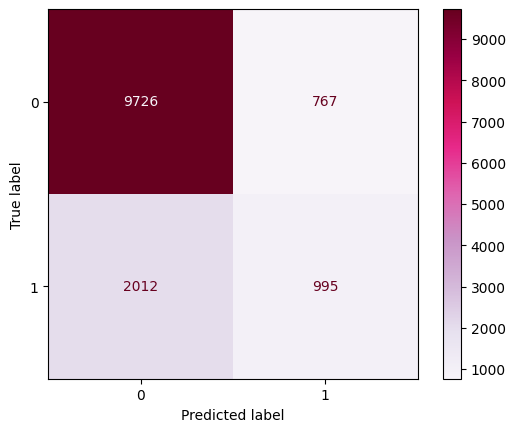

In [ ]:
logistic_model_confusion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=logistic_model_confusion_matrix, display_labels=['0','1'])
disp.plot(cmap=plt.cm.PuRd)
plt.show()

### ***2- RandomForestClassifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest_model.predict(x_test)

In [ ]:
random_forest_model_accuracy = accuracy_score(y_test, y_pred)
random_forest_model_precision = precision_score(y_test, y_pred)
random_forest_model_recall = recall_score(y_test, y_pred)
random_forest_model_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {random_forest_model_accuracy * 100:.2f}%")
print(f"Precision: {random_forest_model_precision * 100:.2f}%")
print(f"Recall: {random_forest_model_recall * 100:.2f}%")
print(f"F1 Score: {random_forest_model_f1 * 100:.2f}%")

Accuracy: 92.76%
Precision: 89.28%
Recall: 76.69%
F1 Score: 82.50%


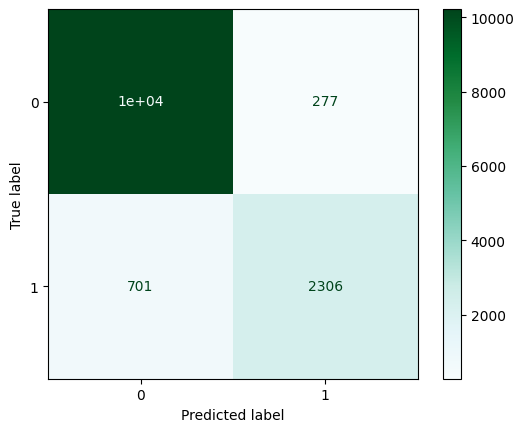

In [ ]:
random_forest_model_confusion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=random_forest_model_confusion_matrix, display_labels=['0','1'])
disp.plot(cmap=plt.cm.BuGn)
plt.show()

### ***3- KNeighborsClassifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
knn_model_accuracy = accuracy_score(y_test, y_pred)
knn_model_precision = precision_score(y_test, y_pred)
knn_model_recall = recall_score(y_test, y_pred)
knn_model_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {knn_model_accuracy * 100:.2f}%")
print(f"Precision: {knn_model_precision * 100:.2f}%")
print(f"Recall: {knn_model_recall * 100:.2f}%")
print(f"F1 Score: {knn_model_f1 * 100:.2f}%")

Accuracy: 79.41%
Precision: 56.47%
Recall: 33.09%
F1 Score: 41.73%


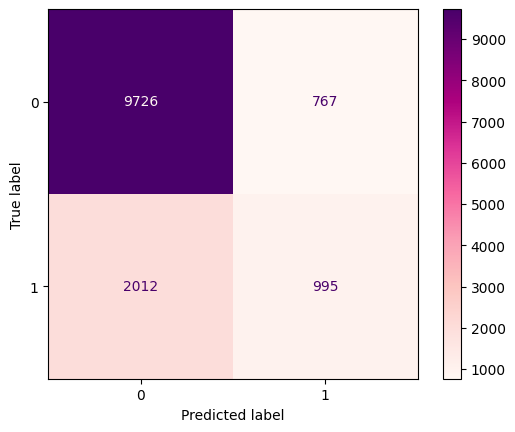

In [ ]:
knn_model_confusion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=knn_model_confusion_matrix, display_labels=['0','1'])
disp.plot(cmap=plt.cm.RdPu)
plt.show()